In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from ipywidgets import interact

In [5]:
x = np.linspace(-3, 3, 1000)
y = [random.gauss(0, 0.5) for _ in x]

In [6]:
def gen_random_line(x0=0, x1=10, points=100, mean=0, div=0, slope=1, intercept=0):
    line = lambda x: slope*x + intercept + random.gauss(mean, div)
    np_line = np.vectorize(line)
    x = np.linspace(x0, x1, points)
    y = np_line(x)
    return (x, y)

interactive(children=(IntSlider(value=0, description='x0', max=10, min=-10), IntSlider(value=0, description='x…

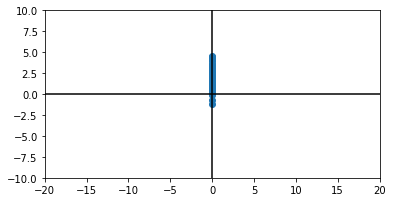

In [7]:
@interact
def plot_rand_line(x0=(-10, 10, 1), x1=(-20, 20, 1), points=(0, 200, 1), mean=(0, 5, 0.1), div=(0, 3, 0.1), slope=(-5, 5, 0.1), intercept=(-5, 5, 0.1)):
    x, y = gen_random_line(x0, x1, points, mean, div, slope, intercept)
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_ylim(-10, 10)
    ax.set_xlim(-20, 20)
    ax.set_aspect('equal')
    ax.axhline(y=0, color='black')
    ax.axvline(x=0, color='black')
    return plt.gcf()

In [8]:
def random_cluster(x0, y0, points, scatter):
    X = []
    Y = []
    for i in range(points):
        X.append(random.gauss(x0, scatter))
        Y.append(random.gauss(y0, scatter))
    
    return (X, Y)

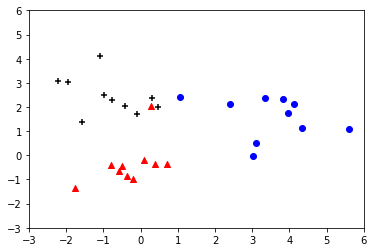

In [9]:
x1, y1 = random_cluster(0, 0, 10, 1)
x2, y2 = random_cluster(3, 2, 10, 1)
x3, y3 = random_cluster(-1, 4, 10, 1)

fig, ax = plt.subplots()
ax.scatter(x1, y1, marker='^', color='red')
ax.scatter(x2, y2, marker='o', color='blue')
ax.scatter(x3, y3, marker='+', color='black')
ax.set_xlim(-3, 6)
ax.set_ylim(-3, 6)
plt.show()

In [10]:
def random_sin(x0, y0, points, A, phase, scatter):
    func = lambda x: A*math.sin(x + phase*np.pi/180) + random.gauss(0, scatter)
    ran_sin = np.vectorize(func)
    x = np.linspace(x0, y0, points)
    y = ran_sin(x)
    return (x, y)

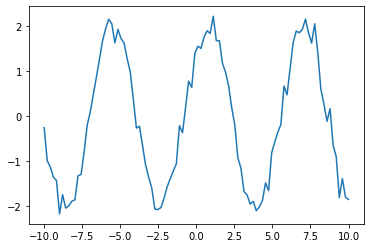

In [11]:
x, y = random_sin(-10, 10, 100, 2, 45, 0.2)
plt.plot(x, y)

In [12]:
def shell_cluster(rad, points, rad_scatter, phase_scatter):
    x = []
    y = []
    angle_diff = 360//points
    for i in range(0, 361, angle_diff):
        phase = random.gauss(0, phase_scatter)
        x.append(math.sin(i * np.pi/180 + phase) * random.gauss(rad, rad_scatter))
        y.append(math.cos(i * np.pi/180 + phase) * random.gauss(rad, rad_scatter))
    
    return (x, y)


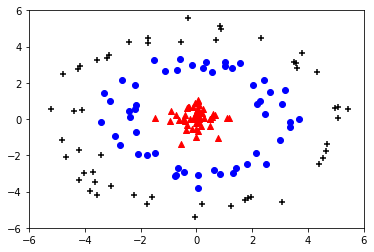

In [13]:
x1, y1 = shell_cluster(0, 50, 0.8, 1)
x2, y2 = shell_cluster(3, 50, 0.5, 1)
x3, y3 = shell_cluster(5, 50, 0.5, 1)

fig, ax = plt.subplots()
ax.scatter(x1, y1, marker='^', color='red')
ax.scatter(x2, y2, marker='o', color='blue')
ax.scatter(x3, y3, marker='+', color='black')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
plt.show()


In [14]:
def simple_dir(x, func, dx):
    return (func(x+dx)-func(x))/dx

In [15]:
def quad(x):
    return 5*np.square(x) - 1*x

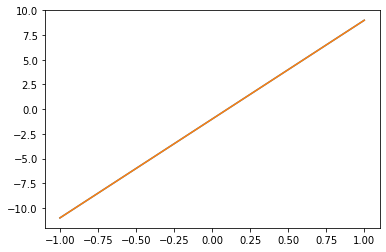

In [26]:
x = np.linspace(-1, 1, 100)
y = quad(x)
#plt.plot(x, y)
y_diff = simple_dir(x, quad, 10**-10)
plt.plot(x, y_diff)
plt.plot(x, 10*x-1)

In [28]:
error = y_diff - (10*x -1)
error

array([-9.10144081e-07, -4.93060349e-06, -6.92787019e-08, -4.08973811e-06,
        7.71586679e-07, -3.24887273e-06,  1.61245206e-06,  6.47377685e-06,
        2.45331744e-06, -1.56714197e-06,  3.29418282e-06, -7.26276589e-07,
        4.13504820e-06, -4.32630331e-06, -3.90587062e-06,  9.55454171e-07,
       -3.06500524e-06,  1.79631955e-06, -2.22413986e-06, -1.80370717e-06,
        3.05761762e-06, -5.40373389e-06, -5.42409099e-07,  2.09846964e-06,
        2.98456281e-07, -3.72200313e-06, -1.08112439e-06,  1.55975435e-06,
       -2.40259009e-07,  2.40061973e-06, -1.61983968e-06,  1.02103906e-06,
        3.31248726e-07, -3.58541609e-07,  6.18910816e-08, -6.27899253e-07,
        9.02756462e-07,  2.12966127e-07, -4.76824208e-07, -5.63915181e-08,
       -7.46181853e-07, -3.25749163e-07, -4.60427985e-07, -3.99952946e-08,
       -1.74674117e-07,  2.45758573e-07,  1.11079750e-07, -2.35990725e-08,
       -1.95000158e-08,  1.92935092e-08,  6.04533001e-09, -7.20285032e-09,
       -3.10379367e-09, -

In [29]:
print(sum(error**2))

4.786588742620067e-10
